<a href="https://colab.research.google.com/github/kukwasrohan/Exploratory-Data-Analysis-EDA-on-Retail-Sales-Data/blob/main/Exploratory_Data_Analysis_(EDA)_on_Retail_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    :- Exploratory Data Analysis (EDA) on Retail Sales Data



# **Data Loading and Cleaning :-**

In [ ]:
import pandas as pd #importing the necessary liabaries
import numpy as np
from scipy.stats import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/retail_sales_dataset.csv') # loading the dataset

In [ ]:
df.head() #taking the first view if the dataset

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
df.shape #cheking the Dataset Rows & Columns count

(1000, 9)

In [ ]:
df.info() #checking  the datatype of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
# Dataset Duplicate Value Count
duplicates_value_count = len(df[df.duplicated()])
duplicates_value_count

0

In [ ]:
# Missing Values/Null Values Count
missing_value_count=df.isna().sum() # it helps to find out sum of all missing value in the Data set
missing_value_count

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

with present analysis of the Retail sales data there is no null values and no duplicate values found that.

# **Descriptive Statistics :-**

In [ ]:
df.describe() # cheking the mean ,median and starndard deviation of the dataset

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [ ]:
mode=df.mode()
mode


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-05-16,CUST001,Female,43.0,Clothing,4.0,50.0,50.0
1,2,NaN,CUST002,NaN,64.0,NaN,NaN,NaN,NaN
2,3,NaN,CUST003,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,CUST004,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,CUST005,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
995,996,NaN,CUST995,NaN,NaN,NaN,NaN,NaN,NaN
996,997,NaN,CUST996,NaN,NaN,NaN,NaN,NaN,NaN
997,998,NaN,CUST997,NaN,NaN,NaN,NaN,NaN,NaN
998,999,NaN,CUST998,NaN,NaN,NaN,NaN,NaN,NaN


# **Time Series Analysis :-**


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.day_name()

In [ ]:
monthly_sales = df.groupby('Month')['Quantity'].sum()
daily_sales = df.groupby('DayOfWeek')['Quantity'].sum()

In [ ]:
busiest_month = monthly_sales.idxmax()
busiest_day = daily_sales.idxmax()

In [ ]:
print('\033[1m' + "Busiest Month (in terms of sells):" +'\033[0m', busiest_month)
print('\033[1m' + "Busiest Day of the Week (in terms of sales):" +'\033[0m', busiest_day)

# Print the results
print('\033[1m' + "Busiest Month (in terms of sales):" +'\033[0m', busiest_month)
print('\033[1m' + "Busiest Day of the Week (in terms of sales):" +'\033[0m', busiest_day)


Busiest Month (in terms of sells): 5
Busiest Day of the Week (in terms of sales): Tuesday
Busiest Month (in terms of sales): 5
Busiest Day of the Week (in terms of sales): Tuesday


In [ ]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,DayOfWeek
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,Friday
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,Monday
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,Friday
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,Sunday
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,Saturday


In [ ]:

# Statistical summary of the time series data
print(df_daily.describe())

       Transaction ID         Age    Quantity  Price per Unit  Total Amount  \
count      366.000000  366.000000  366.000000      366.000000    366.000000   
mean      1367.486339  113.092896    6.868852      491.502732   1245.901639   
std        918.872653   72.956148    4.673359      424.036615   1225.746462   
min          0.000000    0.000000    0.000000        0.000000      0.000000   
25%        709.250000   62.000000    4.000000      100.000000    230.000000   
50%       1197.500000  106.000000    6.000000      430.000000   1000.000000   
75%       1920.250000  151.000000   10.000000      670.000000   1895.000000   
max       4975.000000  523.000000   29.000000     2610.000000   8455.000000   

            Month  
count  366.000000  
mean    17.893443  
std     15.387670  
min      0.000000  
25%      6.000000  
50%     14.000000  
75%     24.750000  
max     72.000000  


# **Customer and Product Analysis** : -  

In [ ]:

# Customer demographics
customer_demographics = df.groupby(['Customer ID', 'Gender', 'Age']).size().reset_index(name='Transaction Count')

# Summary statistics for customer age
age_summary = customer_demographics['Age'].describe()
0
# Gender distribution
gender_distribution = customer_demographics['Gender'].value_counts()

print("Customer Analysis:")
print("Age Summary:")
print(age_summary)
print("\nGender Distribution:")
print(gender_distribution)


Customer Analysis:
Age Summary:
count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: Age, dtype: float64

Gender Distribution:
Female    510
Male      490
Name: Gender, dtype: int64


In [ ]:
product_preferences = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)

# Summary statistics for quantity sold by product category
quantity_summary = product_preferences.describe()

# Average price per unit for each product category
avg_price_per_category = df.groupby('Product Category')['Price per Unit'].mean().sort_values(ascending=False)

# Summary statistics for average price per unit
avg_price_summary = avg_price_per_category.describe()

print("\nProduct Analysis:0")
print("Quantity Summary:")
print(quantity_summary)
print("\nAverage Price per Unit Summary:")
print(avg_price_summary)


Product Analysis:()
Quantity Summary:
count      3.000000
mean     838.000000
std       62.233432
min      771.000000
25%      810.000000
50%      849.000000
75%      871.500000
max      894.000000
Name: Quantity, dtype: float64

Average Price per Unit Summary:()
count      3.000000
mean     180.081236
std        5.131681
min      174.287749
25%      178.094167
50%      181.900585
75%      182.977980
max      184.055375
Name: Price per Unit, dtype: float64


# **Visualization:-**

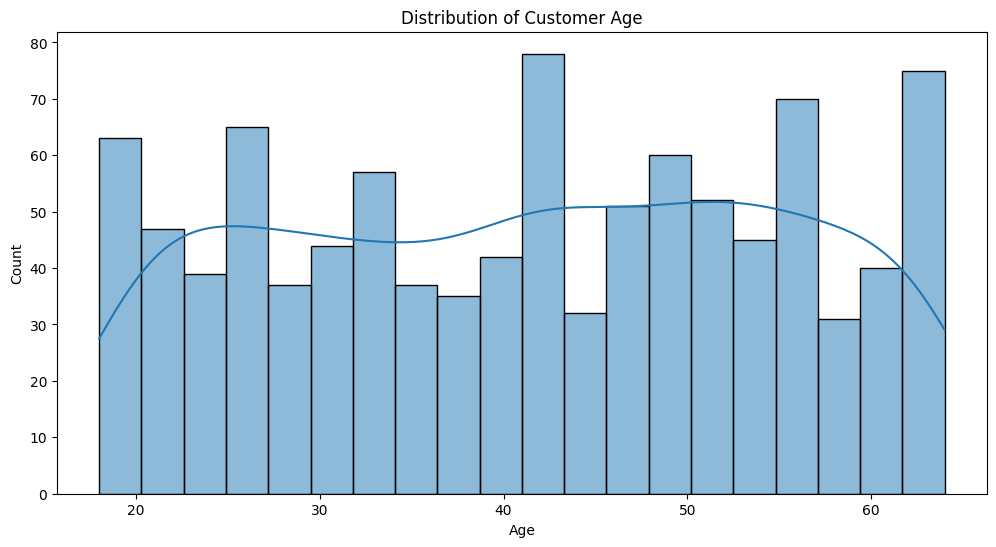

In [ ]:
customer_demographics = df.groupby(['Customer ID', 'Gender', 'Age']).size().reset_index(name='Transaction Count')

# Plot distribution of customer age
plt.figure(figsize=(12, 6))
sns.histplot(customer_demographics['Age'], bins=20, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


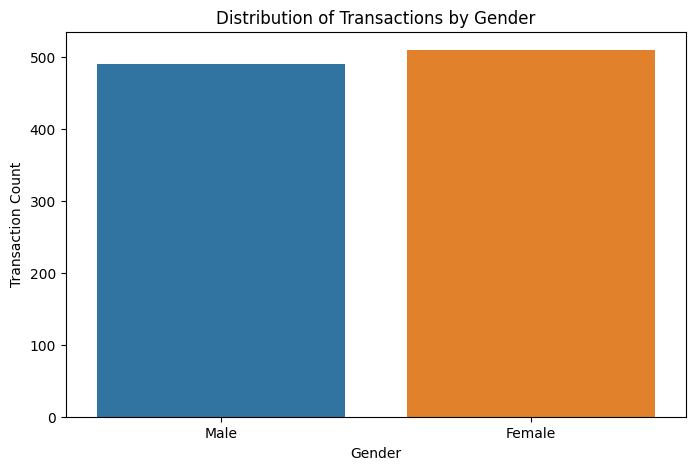

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=customer_demographics)
plt.title('Distribution of Transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Transaction Count')
plt.show()


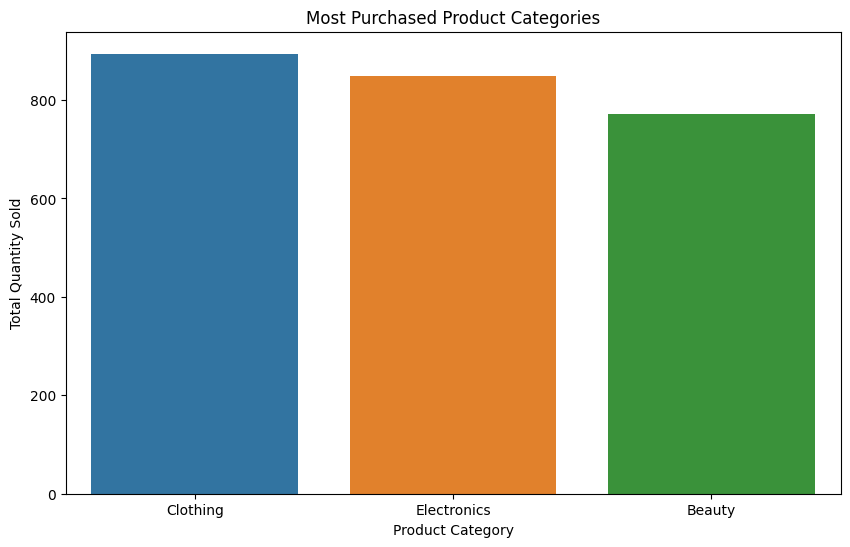

In [ ]:
product_preferences = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=product_preferences.index, y=product_preferences.values)
plt.title('Most Purchased Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.show()


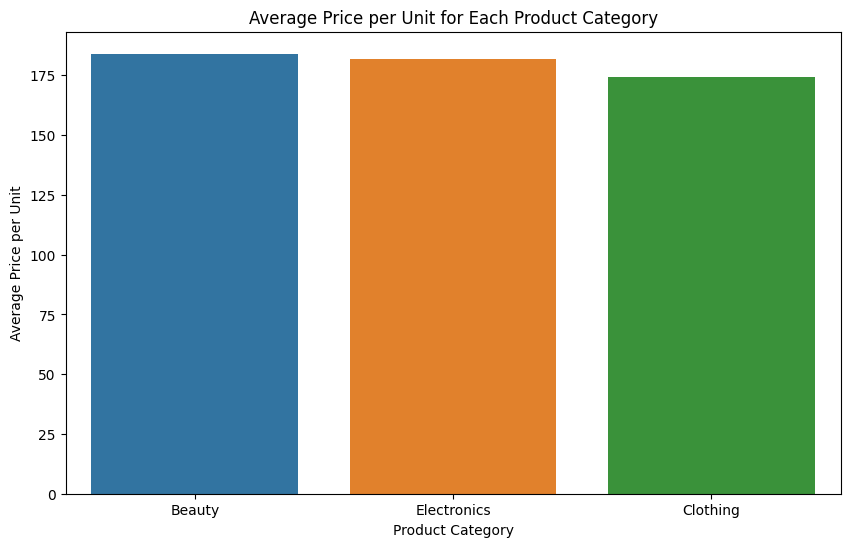

In [ ]:
# Calculate average price per unit for each product category
avg_price_per_category = df.groupby('Product Category')['Price per Unit'].mean().sort_values(ascending=False)

# Plot average price per unit for each product category
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_per_category.index, y=avg_price_per_category.values)
plt.title('Average Price per Unit for Each Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Price per Unit')
plt.show()

<ipython-input-54-3b40c088022e>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily = df.resample('D').sum()


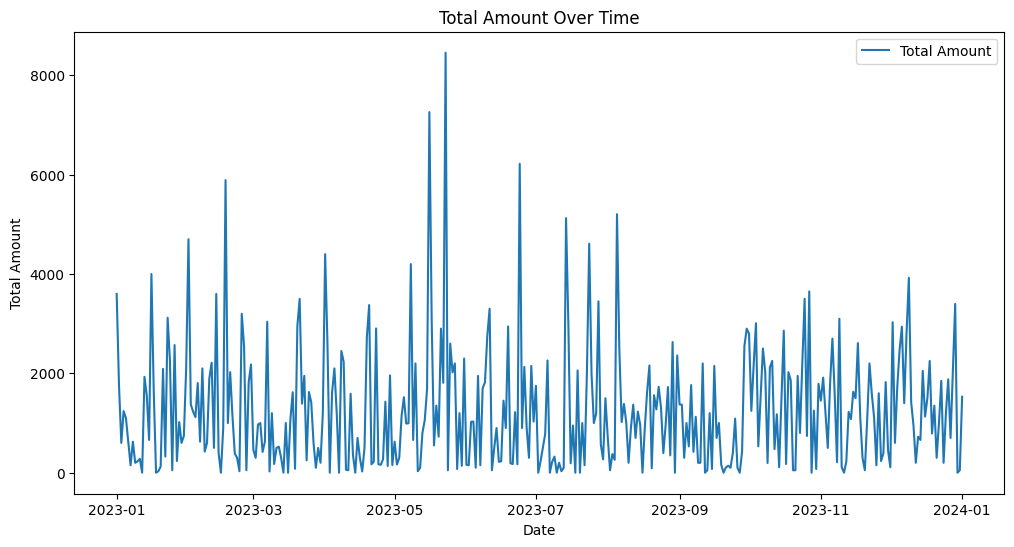

In [ ]:

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index for time series analysis
df.set_index('Date', inplace=True)

# Resample the data to daily frequency
df_daily = df.resample('D').sum()

# Plot total amount over time
plt.figure(figsize=(12, 6))
plt.plot(df_daily['Total Amount'], label='Total Amount')
plt.title('Total Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.show()

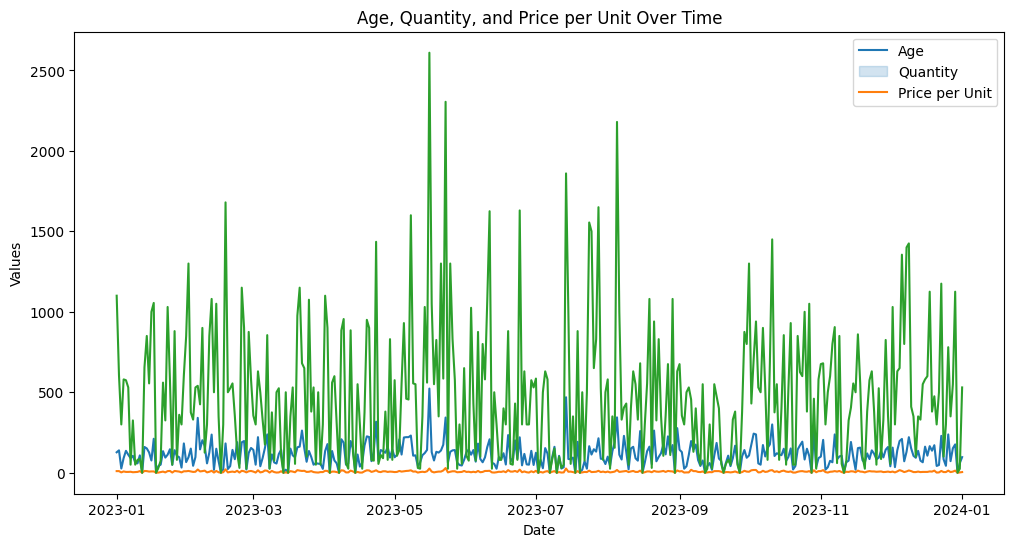

In [ ]:
# Plot other relevant features over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_daily[['Age', 'Quantity', 'Price per Unit']], dashes=False)
plt.title('Age, Quantity, and Price per Unit Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(['Age', 'Quantity', 'Price per Unit'])
plt.show()



#***Recommendations:-***

To grow your business successfully, start by understanding your customers better. Tailor your products and promotions to match the preferences of different age groups and genders. Pay attention to the categories that customers purchase the most, and consider expanding your offerings in those areas. Adjust your pricing strategy to align with customer expectations and preferences. Identify the busiest times, such as the most active month and day of the week, and plan special events or promotions during those periods. Stay attuned to seasonal trends, adjusting your inventory and promotions accordingly.

Encourage customer loyalty through programs that reward repeat business, and personalize your marketing efforts based on individual customer preferences. Efficiently manage your inventory to avoid stockouts or overstock situations, and ensure that your supply chain is both quick and cost-effective. If you have an online presence, invest in improving the usability and aesthetics of your website, and utilize digital marketing channels for promotions and advertisements.

Lastly, actively seek feedback from your customers to gain insights into their experiences and expectations. Use this feedback to address any issues, enhance your products or services, and continually improve your overall business operations. Regularly reassess and adapt these strategies to stay responsive to changing market conditions and foster sustainable growth.







